🤖 STARTING MODEL TRAINING & COMPARISON

STEP 1: Loading cleaned dataset...
📊 Dataset shape: 1460 rows, 82 columns
💰 Target variable: 'SalePrice'
✅ Data loaded successfully

STEP 2: Preparing features and target...
   Converting categorical variables to numbers...
   Features (X) shape: (1460, 240)
   Target (y) shape: (1460,)
   Total features after conversion: 240

STEP 3: Splitting data into train and test...
   Training set: 1168 samples
   Testing set: 292 samples
   Number of features: 240

STEP 4: Scaling features (important for regularization models)...
✅ Features scaled (mean=0, std=1)

STEP 5: Training different models...
--------------------------------------------------
1. Training Linear Regression...
   ✅ Linear Regression trained
2. Training Ridge Regression...
   ✅ Ridge Regression trained
3. Training Lasso Regression...
   ✅ Lasso Regression trained
4. Training Elastic Net Regression...
   ✅ Elastic Net trained

STEP 6: Evaluating models...
📊 Model Performance Compariso

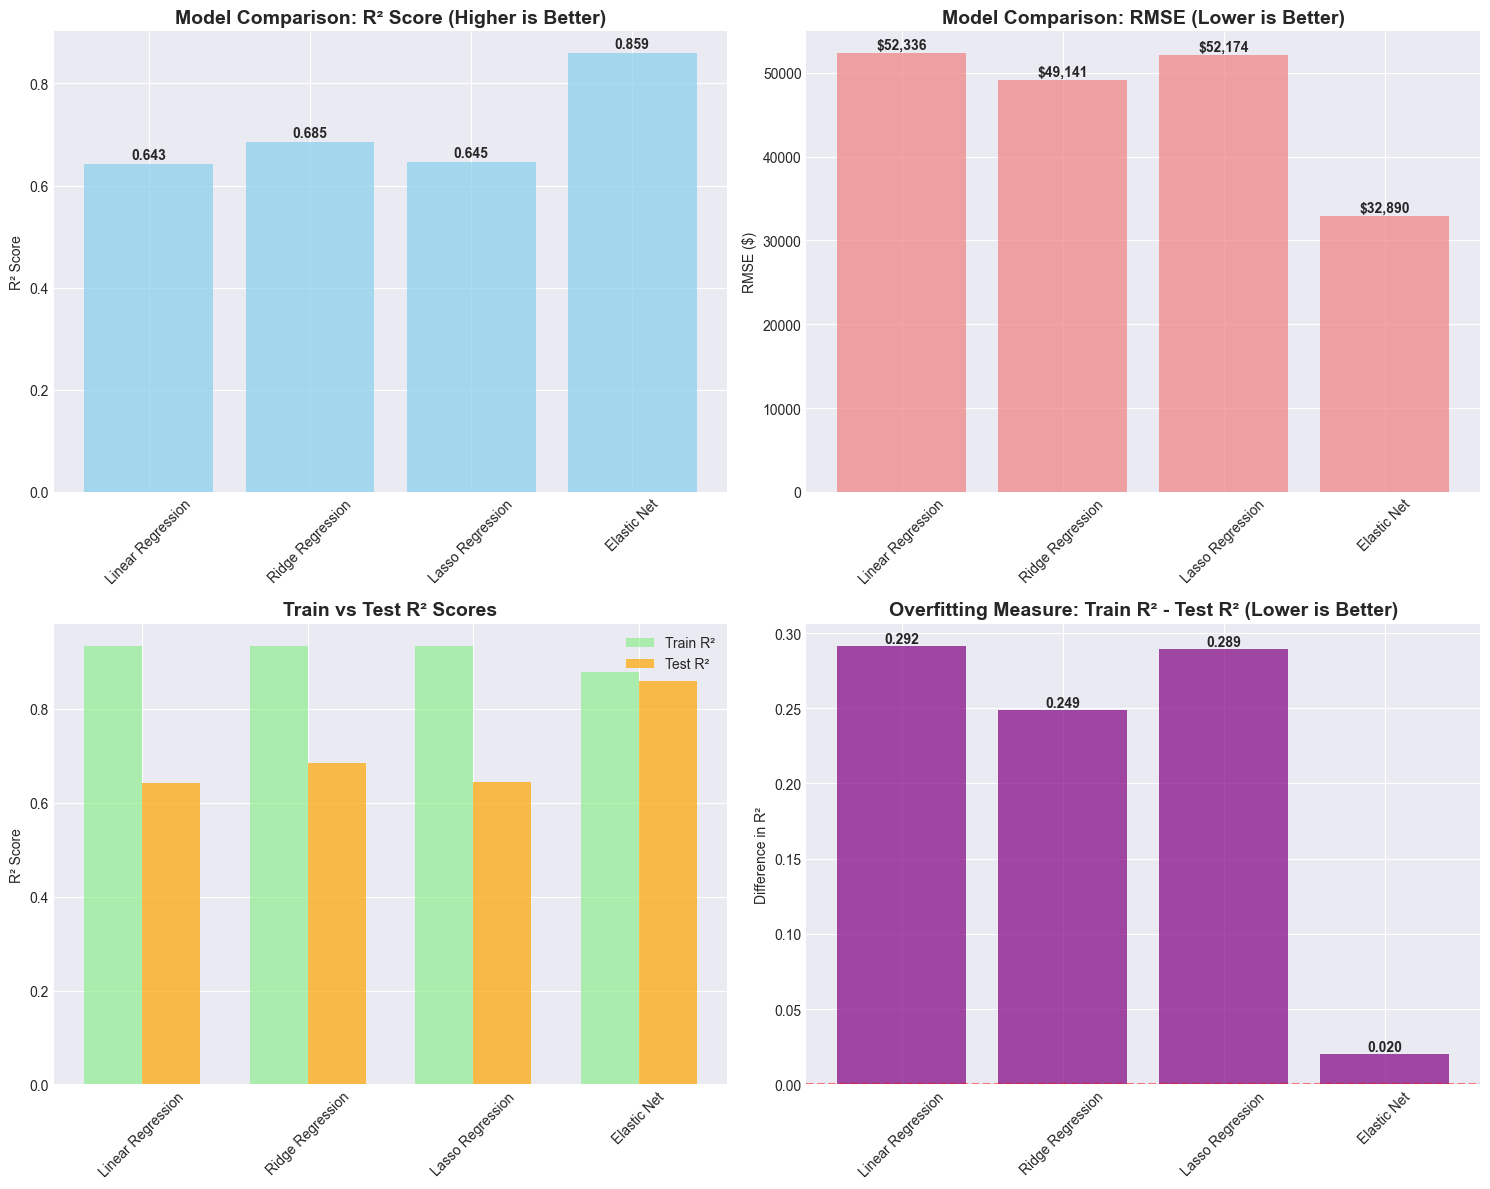

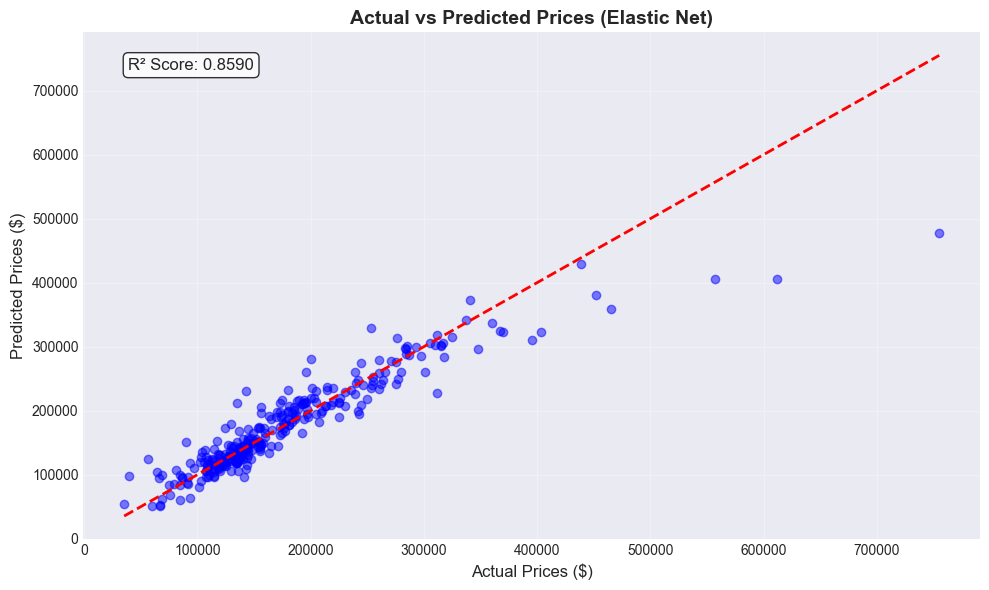

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 60)
print("🤖 STARTING MODEL TRAINING & COMPARISON")
print("=" * 60)
print()

# ===========================================================
# STEP 1: LOAD AND PREPARE THE CLEANED DATA
# ===========================================================
print("STEP 1: Loading cleaned dataset...")
df = pd.read_csv('house_data_cleaned.csv')

# Show dataset info
print(f"📊 Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"💰 Target variable: 'SalePrice'")

# Check if SalePrice exists
if 'SalePrice' not in df.columns:
    print("❌ ERROR: 'SalePrice' column not found!")
    exit()

print("✅ Data loaded successfully")
print()

# ===========================================================
# STEP 2: PREPARE FEATURES AND TARGET
# ===========================================================
print("STEP 2: Preparing features and target...")

# Separate features (X) and target (y)
X = df.drop('SalePrice', axis=1)  # All columns except SalePrice
y = df['SalePrice']  # The price we want to predict

# Handle categorical variables (convert to dummy variables)
print("   Converting categorical variables to numbers...")
X = pd.get_dummies(X, drop_first=True)

print(f"   Features (X) shape: {X.shape}")
print(f"   Target (y) shape: {y.shape}")
print(f"   Total features after conversion: {X.shape[1]}")
print()

# ===========================================================
# STEP 3: SPLIT DATA INTO TRAIN AND TEST SETS
# ===========================================================
print("STEP 3: Splitting data into train and test...")

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Testing set: {X_test.shape[0]} samples")
print(f"   Number of features: {X_train.shape[1]}")
print()

# ===========================================================
# STEP 4: SCALE THE FEATURES
# ===========================================================
print("STEP 4: Scaling features (important for regularization models)...")

# Scale features (some models need this)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled (mean=0, std=1)")
print()

# ===========================================================
# STEP 5: TRAIN DIFFERENT MODELS
# ===========================================================
print("STEP 5: Training different models...")
print("-" * 50)

# Dictionary to store all models
models = {}

# 1. LINEAR REGRESSION (Basic model)
print("1. Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
models['Linear Regression'] = lr_model
print("   ✅ Linear Regression trained")

# 2. RIDGE REGRESSION (L2 regularization)
print("2. Training Ridge Regression...")
ridge_model = Ridge(alpha=1.0, random_state=42)  # alpha = regularization strength
ridge_model.fit(X_train_scaled, y_train)
models['Ridge Regression'] = ridge_model
print("   ✅ Ridge Regression trained")

# 3. LASSO REGRESSION (L1 regularization)
print("3. Training Lasso Regression...")
lasso_model = Lasso(alpha=1.0, random_state=42)  # alpha = regularization strength
lasso_model.fit(X_train_scaled, y_train)
models['Lasso Regression'] = lasso_model
print("   ✅ Lasso Regression trained")

# 4. ELASTIC NET REGRESSION (L1 + L2 regularization)
print("4. Training Elastic Net Regression...")
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)
models['Elastic Net'] = elastic_model
print("   ✅ Elastic Net trained")
print()

# ===========================================================
# STEP 6: EVALUATE EACH MODEL
# ===========================================================
print("STEP 6: Evaluating models...")
print("=" * 60)

# Dictionary to store results
results = []

# Function to calculate metrics
def calculate_metrics(model_name, model, X_train, X_test, y_train, y_test):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Calculate metrics for testing set
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    return {
        'Model': model_name,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Difference_R2': train_r2 - test_r2
    }

# Evaluate each model
print("📊 Model Performance Comparison:")
print("-" * 50)

for name, model in models.items():
    metrics = calculate_metrics(name, model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append(metrics)
    
    print(f"\n{name}:")
    print(f"   Training R²:   {metrics['Train_R2']:.4f}")
    print(f"   Testing R²:    {metrics['Test_R2']:.4f}")
    print(f"   Training RMSE: ${metrics['Train_RMSE']:,.0f}")
    print(f"   Testing RMSE:  ${metrics['Test_RMSE']:,.0f}")
    print(f"   Training MAE:  ${metrics['Train_MAE']:,.0f}")
    print(f"   Testing MAE:   ${metrics['Test_MAE']:,.0f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print()

# ===========================================================
# STEP 7: COMPARE MODELS VISUALLY
# ===========================================================
print("STEP 7: Visualizing model comparison...")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. R² Score Comparison
axes[0, 0].bar(results_df['Model'], results_df['Test_R2'], color='skyblue', alpha=0.7)
axes[0, 0].set_title('Model Comparison: R² Score (Higher is Better)', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['Test_R2']):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

# 2. RMSE Comparison
axes[0, 1].bar(results_df['Model'], results_df['Test_RMSE'], color='lightcoral', alpha=0.7)
axes[0, 1].set_title('Model Comparison: RMSE (Lower is Better)', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('RMSE ($)')
axes[0, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['Test_RMSE']):
    axes[0, 1].text(i, v + 500, f'${v:,.0f}', ha='center', fontweight='bold')

# 3. Train vs Test R²
x = np.arange(len(results_df['Model']))
width = 0.35
axes[1, 0].bar(x - width/2, results_df['Train_R2'], width, label='Train R²', color='lightgreen', alpha=0.7)
axes[1, 0].bar(x + width/2, results_df['Test_R2'], width, label='Test R²', color='orange', alpha=0.7)
axes[1, 0].set_title('Train vs Test R² Scores', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(results_df['Model'], rotation=45)
axes[1, 0].legend()

# 4. Difference between Train and Test R² (Overfitting measure)
axes[1, 1].bar(results_df['Model'], results_df['Difference_R2'], color='purple', alpha=0.7)
axes[1, 1].set_title('Overfitting Measure: Train R² - Test R² (Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Difference in R²')
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df['Difference_R2']):
    axes[1, 1].text(i, v + 0.002, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=100, bbox_inches='tight')
print("✅ Comparison plot saved as 'model_comparison.png'")
print()

# ===========================================================
# STEP 8: SHOW PREDICTIONS VS ACTUAL
# ===========================================================
print("STEP 8: Showing predictions vs actual values...")

# Pick the best model based on Test R²
best_model_name = results_df.loc[results_df['Test_R2'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"🏆 Best model: {best_model_name} (Highest Test R²)")

# Get predictions from best model
y_test_pred = best_model.predict(X_test_scaled)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices ($)', fontsize=12)
plt.ylabel('Predicted Prices ($)', fontsize=12)
plt.title(f'Actual vs Predicted Prices ({best_model_name})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add R² text
plt.text(0.05, 0.95, f'R² Score: {results_df.loc[results_df["Model"] == best_model_name, "Test_R2"].values[0]:.4f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('predictions_vs_actual.png', dpi=100, bbox_inches='tight')
print("✅ Predictions plot saved as 'predictions_vs_actual.png'")
print()

# ===========================================================
# STEP 9: SHOW DETAILED RESULTS TABLE
# ===========================================================
print("STEP 9: Detailed Results Summary")
print("=" * 60)

# Format results for better display
display_df = results_df.copy()
display_df['Train_R2'] = display_df['Train_R2'].map('{:.4f}'.format)
display_df['Test_R2'] = display_df['Test_R2'].map('{:.4f}'.format)
display_df['Train_RMSE'] = display_df['Train_RMSE'].map('${:,.0f}'.format)
display_df['Test_RMSE'] = display_df['Test_RMSE'].map('${:,.0f}'.format)
display_df['Train_MAE'] = display_df['Train_MAE'].map('${:,.0f}'.format)
display_df['Test_MAE'] = display_df['Test_MAE'].map('${:,.0f}'.format)
display_df['Difference_R2'] = display_df['Difference_R2'].map('{:.4f}'.format)

print(display_df.to_string(index=False))
print()

# ===========================================================
# STEP 10: MODEL RECOMMENDATIONS
# ===========================================================
print("STEP 10: Final Recommendations")
print("=" * 60)

# Find best model for each metric
best_r2 = results_df.loc[results_df['Test_R2'].idxmax()]
best_rmse = results_df.loc[results_df['Test_RMSE'].idxmin()]
best_mae = results_df.loc[results_df['Test_MAE'].idxmin()]
least_overfit = results_df.loc[results_df['Difference_R2'].idxmin()]

print("🏆 BEST PERFORMANCE BY METRIC:")
print(f"   Best R² Score:      {best_r2['Model']} ({best_r2['Test_R2']:.4f})")
print(f"   Best RMSE:          {best_rmse['Model']} (${best_rmse['Test_RMSE']:,.0f})")
print(f"   Best MAE:           {best_mae['Model']} (${best_mae['Test_MAE']:,.0f})")
print(f"   Least Overfitting:  {least_overfit['Model']} (Difference: {least_overfit['Difference_R2']:.4f})")
print()

# Overall recommendation
print("💡 RECOMMENDATION:")
if best_r2['Model'] == best_rmse['Model']:
    print(f"   Use {best_r2['Model']} - Consistent best performer across all metrics")
else:
    print(f"   For accuracy: Use {best_r2['Model']}")
    print(f"   For reliability: Use {least_overfit['Model']} (less overfitting)")
print()

# Overfitting check
print("⚠️  OVERFITTING CHECK:")
for index, row in results_df.iterrows():
    diff = row['Difference_R2']
    if diff > 0.1:
        print(f"   {row['Model']}: HIGH overfitting (difference: {diff:.4f})")
    elif diff > 0.05:
        print(f"   {row['Model']}: Moderate overfitting (difference: {diff:.4f})")
    else:
        print(f"   {row['Model']}: Good generalization (difference: {diff:.4f})")

print()
print("=" * 60)
print("✅ MODEL TRAINING COMPLETE!")
print("=" * 60)

# Show feature importance for regularized models (if any)
print("\n📈 FEATURE IMPORTANCE (Top 10 for Lasso):")
if 'Lasso Regression' in models:
    lasso_model = models['Lasso Regression']
    
    # Get coefficients
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': lasso_model.coef_
    })
    
    # Get top 10 most important features (largest absolute coefficients)
    coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
    top_features = coefficients.sort_values('Abs_Coefficient', ascending=False).head(10)
    
    print("Top 10 most important features for price prediction:")
    for idx, row in top_features.iterrows():
        if row['Coefficient'] > 0:
            print(f"   + {row['Feature']}: ${row['Coefficient']:,.0f} impact")
        else:
            print(f"   - {row['Feature']}: ${abs(row['Coefficient']):,.0f} negative impact")

# Save results to CSV
results_df.to_csv('model_results_comparison.csv', index=False)
print("\n💾 Results saved to 'model_results_comparison.csv'")